In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df = pd.read_csv('data/linear_data.csv').set_index('id')

# Visualize The Data

In [45]:
df.head()

,feature,result
id,,
1,1,8.0
2,2,56.0
3,3,160.0
4,4,352.0
5,5,648.0


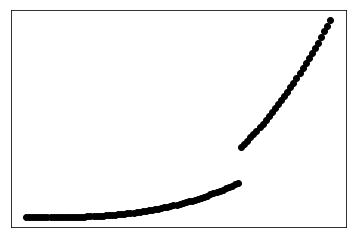

In [49]:
plt.scatter(df['feature'], df['result'],  color='black')
plt.xticks(())
plt.yticks(())
plt.show()

# Create the train/test subsets

Once we have the subsets, let's take a quick look at the shapes and make sure they are similar

In [171]:
train, test = train_test_split(df, test_size = 0.2)
feature_cols = ['feature1', 'feature2']
X_train = train.loc[:, feature_cols]
y_train = np.asarray(train['result'], dtype=np.int16)
X_test = test.loc[:, feature_cols]
y_test = np.asarray(test['result'])
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(56, 2)
(56,)
(14, 2)
(14,)


# Build a Logistic Model and fit the model

Depending on the data set the score will be bonkers

In [172]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [173]:
prediction = logreg.predict(X_train)
prediction

array([ 2078,   430,   199,   222,   681,   579,  3467, 11710,   681,
        9761,  2078,  2466,  3467,   681,  2466,  3020,   681,  2078,
        3467,  9761,  2078,  2222,  2078, 11710,  2078,  9761,   511,
        9761,  2078,   154,  2270,  9761,   681,  2078,   222,  3020,
        3020,  1429,  9761,  2466,   511,  2399,  3467,  2466,  3467,
        3020,  1429,  2399,  5793,  3020,  6331, 11710,   681,  3020,
         290,  2078], dtype=int16)

In [174]:
print(logreg.score(X_train, y_train))

0.214285714286


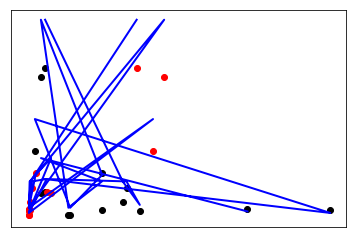

In [175]:
plt.scatter(X_test['feature1'], y_test,  color='black')
plt.scatter(X_test['feature2'], y_test,  color='red')
plt.plot(X_test, logreg.predict(X_test), color='blue',
         linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

## Let's try just training with one column not two

In [176]:
feature_cols = ['feature2']
X_train = train.loc[:, feature_cols]
y_train = np.asarray(train['result'], dtype=np.int16)
X_test = test.loc[:, feature_cols]
y_test = np.asarray(test['result'])
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print(logreg.score(X_train, y_train))

0.0178571428571


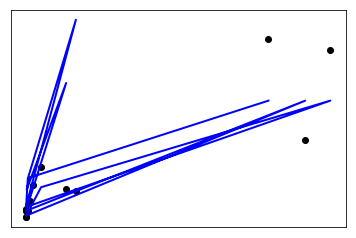

In [177]:
plt.scatter(X_test['feature2'], y_test,  color='black')
plt.plot(X_test, logreg.predict(X_test), color='blue',
         linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

In [178]:
feature_cols = ['feature1']
X_train = train.loc[:, feature_cols]
y_train = np.asarray(train['result'], dtype=np.int16)
X_test = test.loc[:, feature_cols]
y_test = np.asarray(test['result'])
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print(logreg.score(X_train, y_train))

0.0178571428571


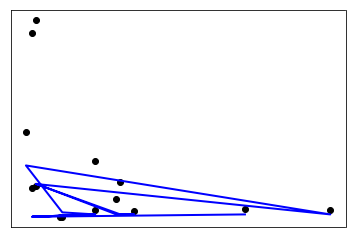

In [179]:
plt.scatter(X_test['feature1'], y_test,  color='black')
plt.plot(X_test, logreg.predict(X_test), color='blue',
         linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

## Maybe we'll get a better result if we tweak some of the model parameters

First we get a baseline and we can see that the score is just over 20%...let's see what happens if we go tweaking on those parameters.

In [183]:
feature_cols = ['feature1', 'feature2']
X_train = train.loc[:, feature_cols]
y_train = np.asarray(train['result'], dtype=np.int16)
X_test = test.loc[:, feature_cols]
y_test = np.asarray(test['result'])
logreg = LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [184]:
print(logreg.score(X_train, y_train))

0.214285714286


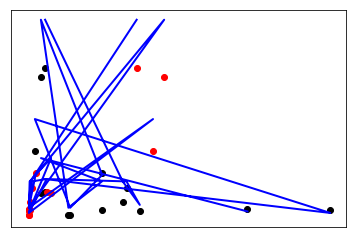

In [182]:
plt.scatter(X_test['feature1'], y_test,  color='black')
plt.scatter(X_test['feature2'], y_test,  color='red')
plt.plot(X_test, logreg.predict(X_test), color='blue',
         linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

In [216]:
logreg = LogisticRegression(C=10.0, solver='lbfgs')
logreg.fit(X_train,y_train)
print(logreg.score(X_train, y_train))

0.982142857143


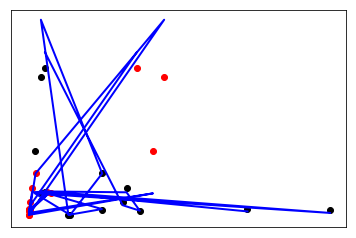

In [217]:
plt.scatter(X_test['feature1'], y_test,  color='black')
plt.scatter(X_test['feature2'], y_test,  color='red')
plt.plot(X_test, logreg.predict(X_test), color='blue',
         linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

# Now let's try a linear mode (I bet it fits mucb better!)

In [3]:
from sklearn import linear_model

In [15]:
df = pd.read_csv('data/linear_data.csv').set_index('id')

In [16]:
train, test = train_test_split(df, test_size = 0.2)
feature_cols = ['feature']
X_train = train.loc[:, feature_cols]
y_train = np.asarray(train['result'], dtype=np.float64)
X_test = test.loc[:, feature_cols]
y_test = np.asarray(test['result'])
clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
clf.coef_

array([ 28751.91986496])

In [57]:
clf.score(X_test, y_test)

0.58354621028912423

In [58]:
y_test

array([  2.46400000e+05,   1.40140000e+06,   2.85768000e+05,
         6.62480000e+04,   1.48480000e+04,   3.51139941e+06,
         1.02400000e+06,   1.78848000e+05,   8.00000000e+00,
         2.96000000e+04,   6.48000000e+02,   1.12384800e+06,
         6.04800000e+03,   5.60000000e+01,   1.13400000e+05,
         4.09556512e+06,   4.56192000e+05,   4.28544000e+05,
         7.43600000e+04,   4.60000000e+03])

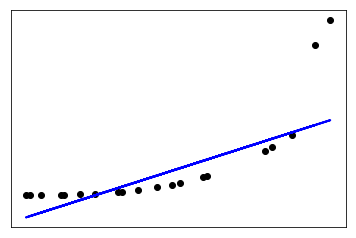

In [59]:
plt.scatter(X_test['feature'], y_test,  color='black')
plt.plot(X_test, clf.predict(X_test), color='blue',
         linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

# Now Let's try Polynomial Regression

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [50]:
train, test = train_test_split(df, test_size = 0.2)
feature_cols = ['feature']
X_train = train.loc[:, feature_cols]
y_train = np.asarray(train['result'], dtype=np.float64)
X_test = test.loc[:, feature_cols]
y_test = np.asarray(test['result'])
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression(fit_intercept=False))])

In [51]:
model = model.fit(X_train, y_train)

In [52]:
model.named_steps['linear'].coef_

array([  1.35260671e+05,  -6.24730521e+03,  -3.15640343e+02,
         1.19820785e+01])

In [53]:
model.score(X_test,y_test)

0.93357203050785442

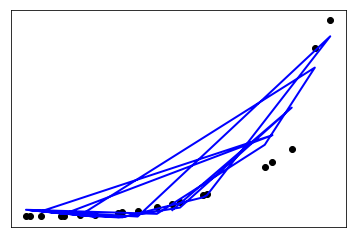

In [54]:
plt.scatter(X_test['feature'], y_test,  color='black')
plt.plot(X_test, model.predict(X_test), color='blue',
         linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()